In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [ ]:
os.chdir(r"C:\Users\Kael\Desktop\MachineLearningCVE-20230501T005316Z-001\MachineLearningCVE")


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None 

df6 = pd.read_csv("Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")

df = pd.concat([df6,df6])
del df6

nRow, nCol = df.shape


In [ ]:
#change the variable types for low memory usage
#int64 to int32,,, float64 to float32
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [ ]:
df.columns =  df.columns.str.strip()

In [ ]:
# drop nan and infinite rows
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

In [ ]:
# merging similar classes with low instances
df["Label"] = df["Label"].replace(["Web Attack: Brute Force","Web Attack: XSS","Web Attack: Sql Injection"],"Web Attack")

In [ ]:
# drop duplicate rows
df =  df.drop_duplicates(keep="first")
df.reset_index(drop=True,inplace=True)

In [ ]:
#feature reduction 
#dropping very high correlated features 
numeric_columns = df.select_dtypes(include=[np.number])

corr_matrix = numeric_columns.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df =  df.drop(to_drop, axis=1)
df.shape

C:\Users\Kael\AppData\Local\Temp\ipykernel_11496\3368027.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


(164179, 54)

In [ ]:
x = df.drop(["Label"],axis=1)
y = df["Label"]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
#from xgboost import XGBClassifier
import time
import numpy as np 
import pandas as pd
import os

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical labels in y
encoded_labels = label_encoder.fit_transform(y)

In [ ]:


# Check the distribution of classes in encoded_labels
class_counts = np.bincount(encoded_labels)
min_class_count = np.min(class_counts)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, encoded_labels, test_size=0.3, random_state=42, stratify=encoded_labels)

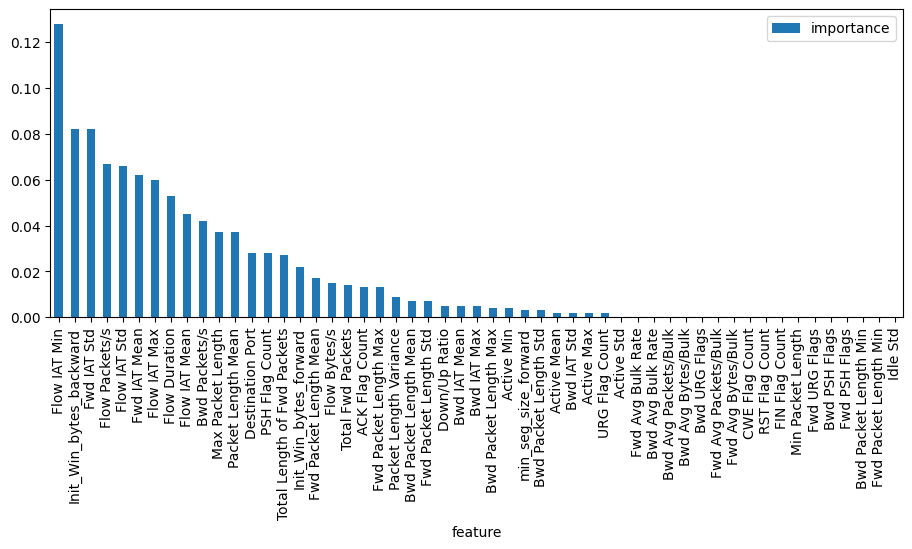

In [ ]:
#Feature Selection
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, y_train);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestClassifier()

# create the RFE model and select 20 attributes
rfe = RFE(rfc, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

a = [i[0] for i in feature_map]
train_X = X_train.iloc[:,a]
test_X = X_test.iloc[:,a]

In [ ]:
#Dataset Partition
X_train,X_test,Y_train,Y_test = train_test_split(train_X,y_train,train_size=0.70, random_state=2)

#Fitting Models
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier




In [ ]:
# Train KNeighborsClassifier Model
from sklearn.linear_model import SGDClassifier


KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
# Train the classifier on the training data
KNN_Classifier.fit(X_train, Y_train); 
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
# Train the classifier on the training data
LGR_Classifier.fit(X_train, Y_train);
# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
# Train the classifier on the training data
BNB_Classifier.fit(X_train, Y_train);
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
# Train the classifier on the training data
DTC_Classifier.fit(X_train, Y_train);
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()
# Train the classifier on the training data
dt.fit(X_train, Y_train); 
# Create a Random Forest classifier
rf = RandomForestClassifier()
# Train the classifier on the training data
rf.fit(X_train, Y_train); 
# Create an XGBoost classifier
xgb = SGDClassifier()
# Train the classifier on the training data
xgb.fit(X_train, Y_train); 
# Create a LightGBM classifier
lgbm = lgb.LGBMClassifier()
# Train the classifier on the training data
lgbm.fit(X_train, Y_train); 

# Create a CatBoost classifier
catboost = CatBoostClassifier()

# Train the classifier on the training data
catboost.fit(X_train, Y_train); 










Learning rate set to 0.09897
0:	learn: 1.1144137	total: 159ms	remaining: 2m 38s
1:	learn: 0.9289881	total: 171ms	remaining: 1m 25s
2:	learn: 0.7896812	total: 184ms	remaining: 1m 1s
3:	learn: 0.6813467	total: 197ms	remaining: 49s
4:	learn: 0.5929870	total: 209ms	remaining: 41.7s
5:	learn: 0.5198733	total: 224ms	remaining: 37.2s
6:	learn: 0.4594059	total: 237ms	remaining: 33.7s
7:	learn: 0.4079976	total: 251ms	remaining: 31.2s
8:	learn: 0.3636200	total: 263ms	remaining: 29s
9:	learn: 0.3249088	total: 275ms	remaining: 27.2s
10:	learn: 0.2918278	total: 287ms	remaining: 25.8s
11:	learn: 0.2624071	total: 298ms	remaining: 24.5s
12:	learn: 0.2365271	total: 312ms	remaining: 23.7s
13:	learn: 0.2138009	total: 324ms	remaining: 22.8s
14:	learn: 0.1937041	total: 335ms	remaining: 22s
15:	learn: 0.1760088	total: 348ms	remaining: 21.4s
16:	learn: 0.1602155	total: 359ms	remaining: 20.8s
17:	learn: 0.1459488	total: 371ms	remaining: 20.2s
18:	learn: 0.1334416	total: 384ms	remaining: 19.8s
19:	learn: 0.121

In [ ]:
#Evaluate Models
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('Decision Tree', dt))
models.append(('Random Forest ', rf))
models.append(('XGBoost', xgb))
models.append(('LightGBM', lgbm))
models.append(('CatBoost', catboost))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    



#Validate Models
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


# PREDICTING FOR TEST DATA
pred_knn = KNN_Classifier.predict(test_X)
pred_NB = BNB_Classifier.predict(test_X)
pred_log = LGR_Classifier.predict(test_X)
pred_dt = DTC_Classifier.predict(test_X)


C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: Undefin


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9863885562284995

Model Accuracy:
 0.9863885539547776

Confusion matrix:
 [[79352     0     0     0]
 [  751     0     0     0]
 [   12     0     0     0]
 [  332     0     0     0]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     79352
           1       0.00      0.00      0.00       751
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00       332

    accuracy                           0.99     80447
   macro avg       0.25      0.25      0.25     80447
weighted avg       0.97      0.99      0.98     80447



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9937723070038345

Model Accuracy:
 0.9999254167339988

Confusion matrix:
 [[79352  

C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: Undefin


============================== LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.9822243478148

Model Accuracy:
 0.9758598829042724

Confusion matrix:
 [[78505     0     8   839]
 [  751     0     0     0]
 [   12     0     0     0]
 [  332     0     0     0]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     79352
           1       0.00      0.00      0.00       751
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00       332

    accuracy                           0.98     80447
   macro avg       0.25      0.25      0.25     80447
weighted avg       0.97      0.98      0.97     80447



============================== Decision Tree Model Evaluation ==============================

Cross Validation Mean Score:
 0.99349882822846

Model Accuracy:
 0.9999254167339988

Confusion matrix:
 [[79352     0     0     0]
 

C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: Undefin


============================== XGBoost Model Evaluation ==============================

Cross Validation Mean Score:
 0.9800116991722654

Model Accuracy:
 0.9804467537633473

Confusion matrix:
 [[78874    49     0   429]
 [  751     0     0     0]
 [   12     0     0     0]
 [  332     0     0     0]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     79352
           1       0.00      0.00      0.00       751
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00       332

    accuracy                           0.98     80447
   macro avg       0.25      0.25      0.25     80447
weighted avg       0.97      0.98      0.98     80447



============================== LightGBM Model Evaluation ==============================

Cross Validation Mean Score:
 0.9895335490105847

Model Accuracy:
 0.9976009049436275

Confusion matrix:
 [[79347     4     0     1]
 [    5   68

C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: Undefin


============================== KNeighborsClassifier Model Test Results ==============================

Model Accuracy:
 0.9955043796043854

Confusion matrix:
 [[34057    13     2     1]
 [   10   231     0    37]
 [    3     0     0     0]
 [    7    82     0    35]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     34073
           1       0.71      0.83      0.76       278
           2       0.00      0.00      0.00         3
           3       0.48      0.28      0.36       124

    accuracy                           1.00     34478
   macro avg       0.55      0.53      0.53     34478
weighted avg       1.00      1.00      1.00     34478



============================== LogisticRegression Model Test Results ==============================

Model Accuracy:
 0.9791461221648587

Confusion matrix:
 [[33759     1     3   310]
 [  278     0     0     0]
 [    3     0     0     0]
 [  124     0     0     0]]

Cl

C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: Undefin


============================== Random Forest  Model Test Results ==============================

Model Accuracy:
 0.9949242995533384

Confusion matrix:
 [[34051    17     0     5]
 [   10   218     0    50]
 [    2     1     0     0]
 [    7    83     0    34]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     34073
           1       0.68      0.78      0.73       278
           2       0.00      0.00      0.00         3
           3       0.38      0.27      0.32       124

    accuracy                           0.99     34478
   macro avg       0.52      0.51      0.51     34478
weighted avg       0.99      0.99      0.99     34478



============================== XGBoost Model Test Results ==============================

Model Accuracy:
 0.9829746505017692

Confusion matrix:
 [[33891    17     0   165]
 [  278     0     0     0]
 [    3     0     0     0]
 [  124     0     0     0]]

Classification repo

C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: Undefin